# Internet Access Data
### Source: World Data bank

#### Instructions:
In order to run this file, you must create a directory called '/data/internet' and add these files (from google drive folder data -> internet)
1. 'wrldbnk_broadband_subscriptions.csv'
2. 'wrldbnk_internet_usage.csv'


# Setup 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import os

DATA_DIR = 'data'
INTERNET_DIR = os.path.join(DATA_DIR, 'internet')

SELECTED_COUNTRIES = [
'south africa',
'kenya',
'china',
'taiwan',
'japan',
'south korea',
'india',
'pakistan',
'indonesia',
'philippines',
'singapore',
'thailand',
'canada',
'united kingdom',
'ireland',
'scotland',
'australia',
'new zealand',
'united states',
'korea, rep.']

In [6]:
def load_data_frame(file_name, path):
    """
    Loads data from specified path and returns a data frame.
    """
    file_path = os.path.join(path, file_name)
    return pd.read_csv(file_path)

def clean_worldbank_data(df):
    """
    Removes extra columns that come from worldbank data files.
    Converts all values to numeric and lowercase.
    """
    #remove unneeded columns
    df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace = True)

    #replace non-numericals
    df = df.replace('..', np.NaN)

    #convert all columns of DataFrame to numeric
    df.loc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

    #convert country names to lowercase
    df['Country Name'] = df['Country Name'].str.lower()
    return df

def get_date_range(df, start_year, end_year_exclusive):
    """
    Returns a dataframe with the selected date range.
    """
    columns = df.columns
    country_index = columns.get_loc('Country Name') #make sure not to remove the country column
    start_index = columns.get_loc(start_year)
    end_index = columns.get_loc(end_year_exclusive)
    ranged_df = df.iloc[:,np.r_[country_index ,start_index : end_index]]
    return ranged_df


## Fixed Broadband Subscriptions per 100 People 

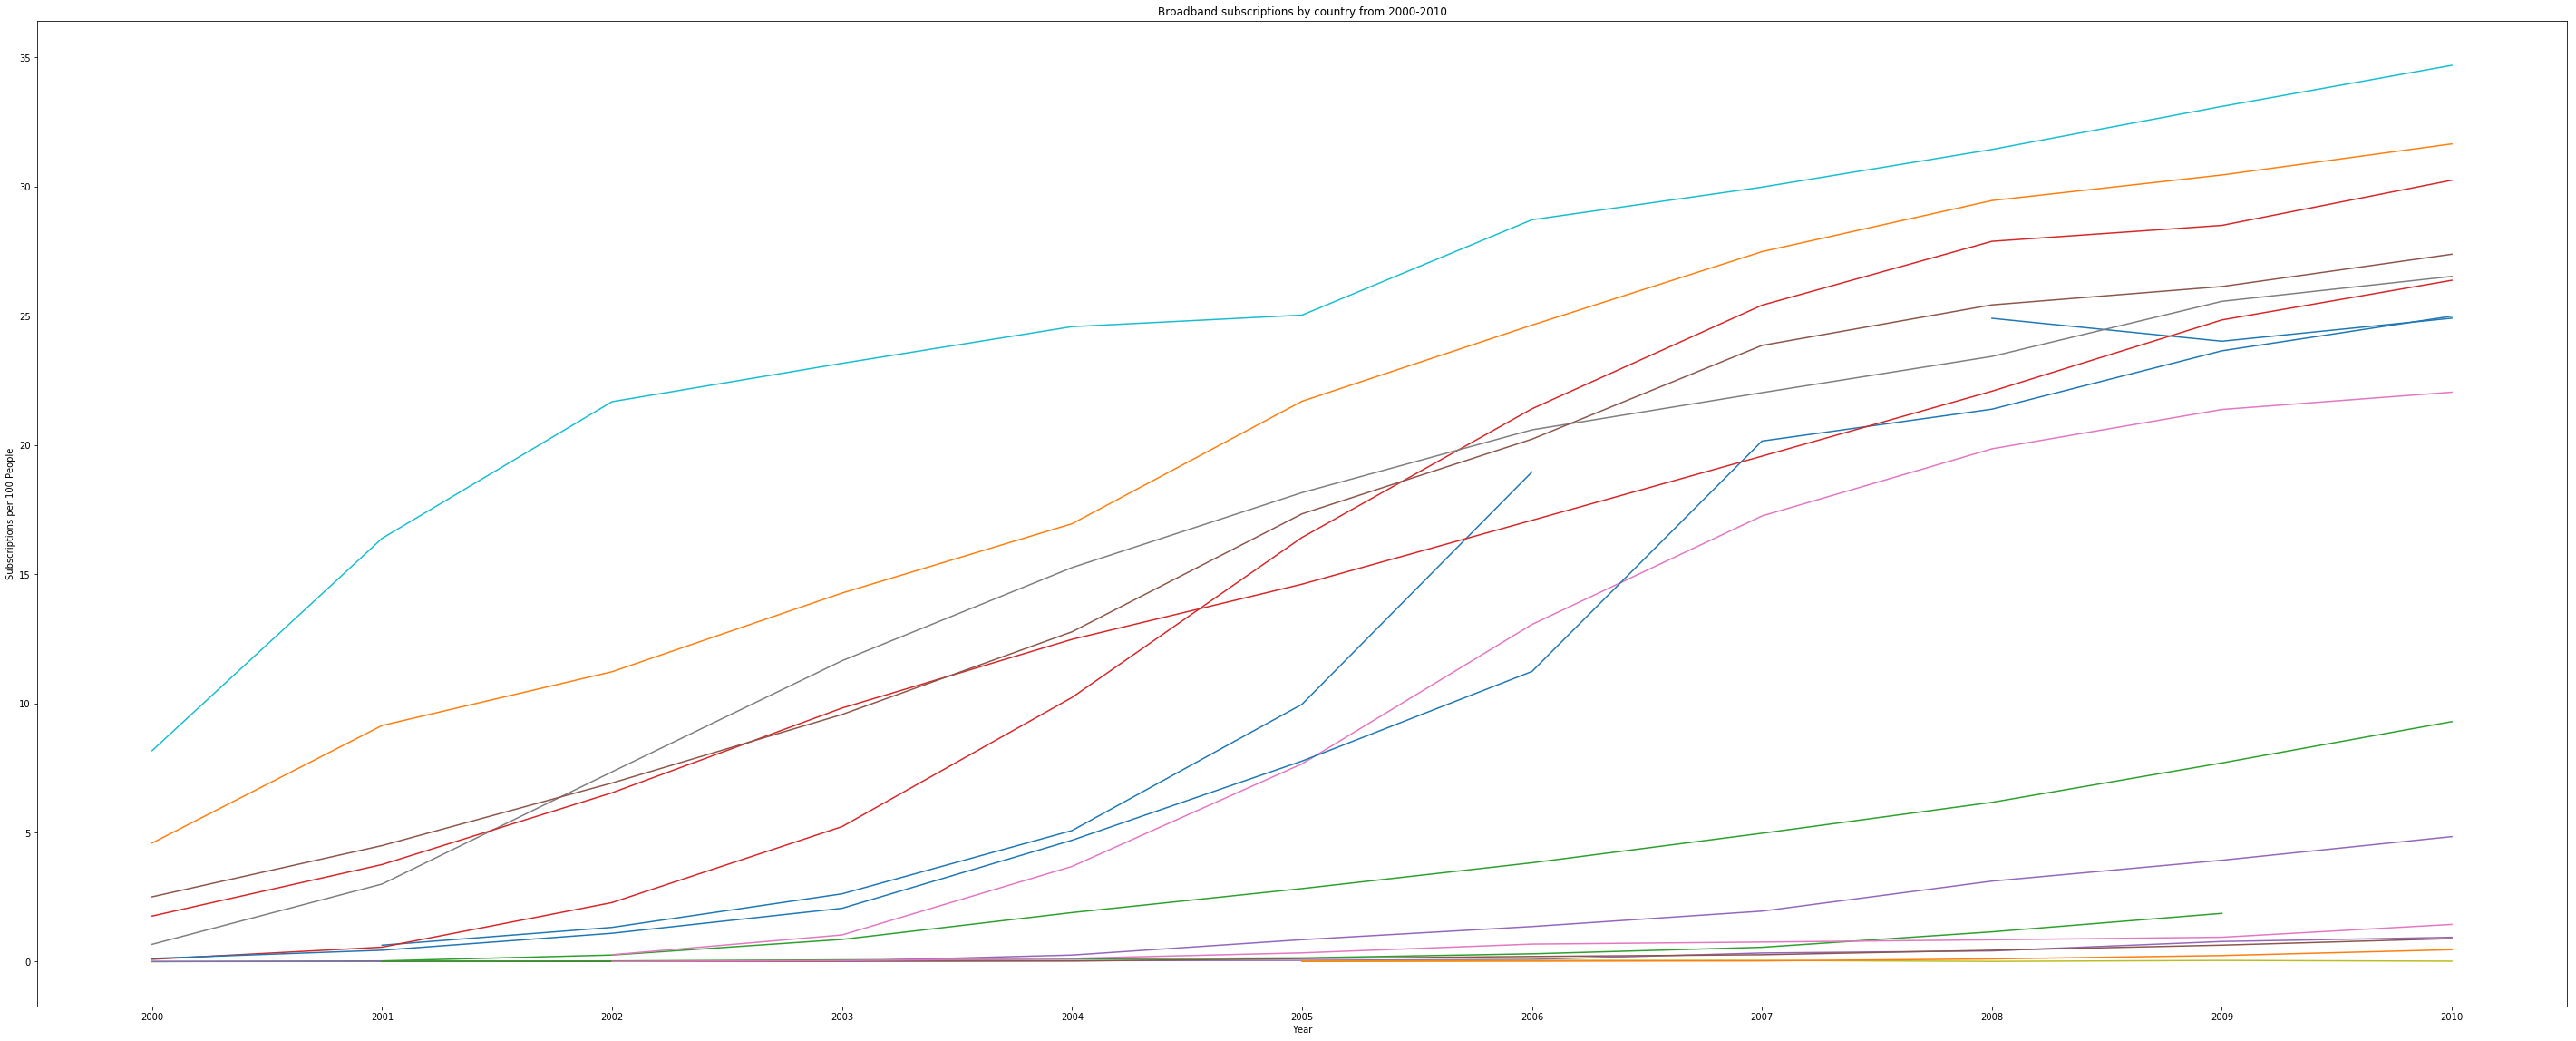

In [7]:
broadband_df = load_data_frame('wrldbnk_broadband_subscriptions.csv', INTERNET_DIR)

broadband_df = clean_worldbank_data(broadband_df)

#select the countries with data from newslookup.com
filtered_df = broadband_df.loc[broadband_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
broadband_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(broadband_t[1:])
ax.set(title='Broadband subscriptions by country from 2000-2010',
 ylabel='Subscriptions per 100 People', xlabel='Year')
plt.show()

dated_df.head()

## Internet Users per 100 People, per Country

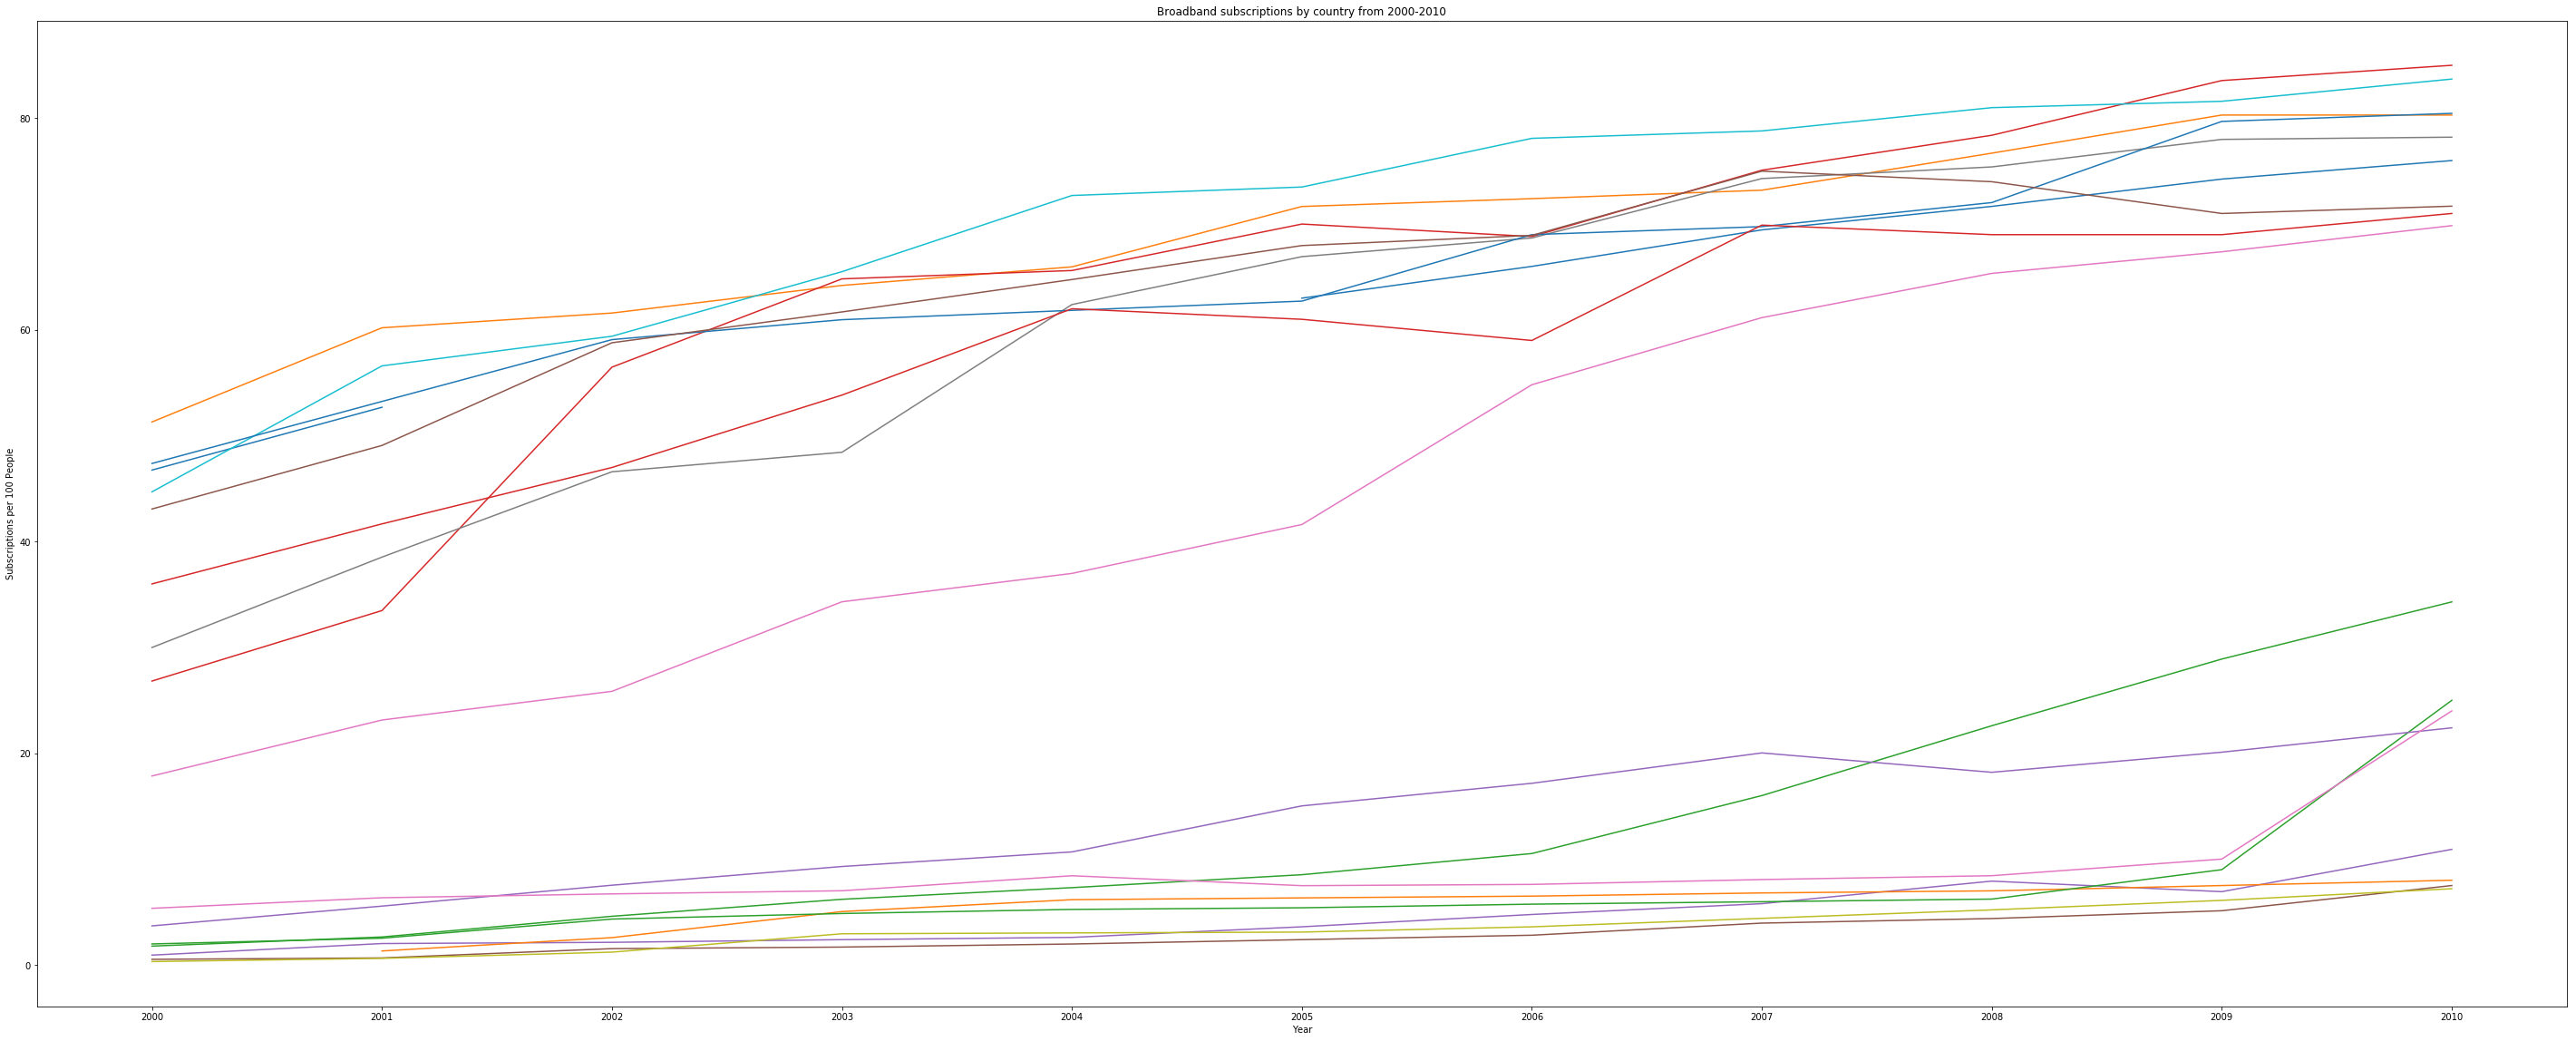

In [10]:
usage_df = load_data_frame('wrldbnk_internet_usage.csv', INTERNET_DIR)

usage_df = clean_worldbank_data(usage_df)

#select the countries with data from newslookup.com
filtered_df = usage_df.loc[usage_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
broadband_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(broadband_t[1:])
ax.set(title='Broadband subscriptions by country from 2000-2010',
 ylabel='Subscriptions per 100 People', xlabel='Year')
plt.show()

dated_df.head()